In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("Train_Data.csv")

In [3]:
train_data.head() # healty bmi(Body Mass Index) for an person ranges 18.5-24

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [4]:
df = train_data.copy()

In [5]:
df.shape

(3630, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


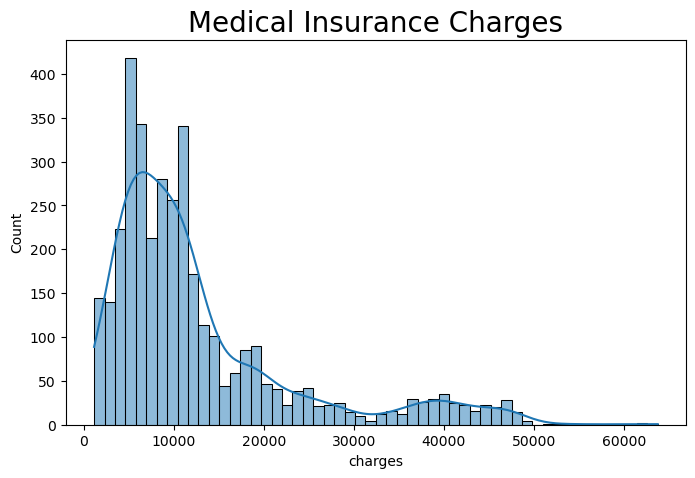

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(x = df['charges'], kde = True)
plt.title('Medical Insurance Charges', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Gender count')

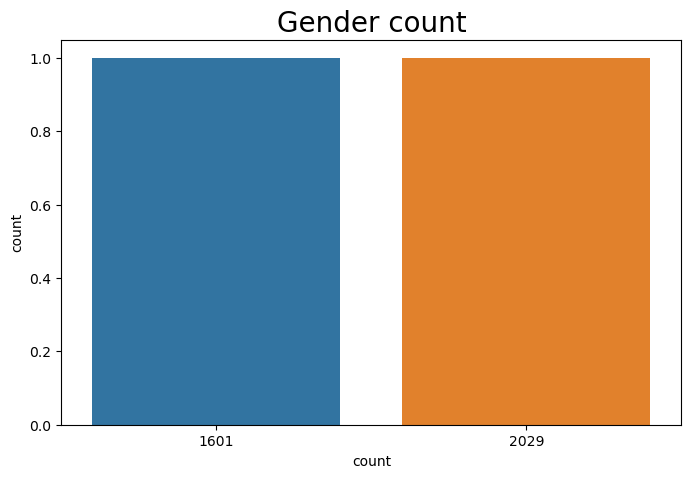

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["sex"].value_counts(),data =df)
plt.title('Gender count', fontsize=20)

In [10]:
#df["sex"].value_counts()

In [11]:
print("Smokers     :", df['smoker'].value_counts()[1])
print("Non-Smokers :", df['smoker'].value_counts()[0])
print("South-East region :", df['region'].value_counts()[0])
print("North-West region :", df['region'].value_counts()[1])
print("South-West region :", df['region'].value_counts()[2])
print("North-East region :", df['region'].value_counts()[3])

Smokers     : 560
Non-Smokers : 3070
South-East region : 1021
North-West region : 911
South-West region : 850
North-East region : 848


In [13]:
le = LabelEncoder()

df["sex"] = le.fit_transform(df['sex'])
df["smoker"] = le.fit_transform(df['smoker'])

In [14]:
# Encoding:
df= pd.get_dummies(df, drop_first=True)
# top 2 records, after encoding:
df.head(2)

,age,sex,bmi,smoker,children,charges,region_northwest,region_southeast,region_southwest
0,21.000000,1,25.745000,0,2,3279.868550,False,False,False
1,36.976978,0,25.744165,1,3,21454.494239,False,True,False


In [15]:
df = df.rename(columns={"region_northwest": "northwest","region_southeast": "southeast", "region_southwest": "southwest"})

In [16]:
df.head()

,age,sex,bmi,smoker,children,charges,northwest,southeast,southwest
0,21.000000,1,25.745000,0,2,3279.868550,False,False,False
1,36.976978,0,25.744165,1,3,21454.494239,False,True,False
2,18.000000,1,30.030000,0,1,1720.353700,False,True,False
3,37.000000,1,30.676891,0,3,6801.437542,False,False,False
4,58.000000,1,32.010000,0,1,11946.625900,False,True,False


In [17]:
df = df[["age","sex", 'bmi', "smoker", 'children','northwest', 'southeast', 'southwest', 'charges']]
df.head()

,age,sex,bmi,smoker,children,northwest,southeast,southwest,charges
0,21.000000,1,25.745000,0,2,False,False,False,3279.868550
1,36.976978,0,25.744165,1,3,False,True,False,21454.494239
2,18.000000,1,30.030000,0,1,False,True,False,1720.353700
3,37.000000,1,30.676891,0,3,False,False,False,6801.437542
4,58.000000,1,32.010000,0,1,False,True,False,11946.625900


In [18]:
df["northwest"] = le.fit_transform(df['northwest'])
df["southeast"] = le.fit_transform(df['southeast'])
df['southwest'] = le.fit_transform(df['southwest'])


In [19]:
df["age"] = round(df["age"])

In [20]:
x= df.iloc[:, :-1]
y = df.iloc[:, -1]

x.head()

,age,sex,bmi,smoker,children,northwest,southeast,southwest
0,21.0,1,25.745000,0,2,0,0,0
1,37.0,0,25.744165,1,3,0,1,0
2,18.0,1,30.030000,0,1,0,1,0
3,37.0,1,30.676891,0,3,0,0,0
4,58.0,1,32.010000,0,1,0,1,0


In [21]:
y.head()

0     3279.868550
1    21454.494239
2     1720.353700
3     6801.437542
4    11946.625900
Name: charges, dtype: float64

In [22]:
# Train Test Split:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=32)

In [23]:
#Model Building:

# Importing Performance Metrics:
from sklearn.metrics import mean_squared_error, r2_score
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7256764246806905
36330052.34532585


In [24]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9151697333038578
11234499.353369527
